<a href="https://colab.research.google.com/github/Vincent3003/Diamond-Quality-vs.-Price-Tradeoff/blob/main/Diamond_Quality_vs_Price_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Data from Kaggle (https://www.kaggle.com/datasets/shivam2503/diamonds)
- __Description:__ this dataset contains the prices and other attributes of almost 54,000 diamonds.
- __Content__:

__price__ price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal) -> this one in my split dataset, I changed from categorical varaible to numerical one that rank from 1 (worst) -> 5 (best)

**color** diamond colour, from J (worst) to D (best) -> this one in my split dataset, I changed from categorical varaible to numerical one that rank from 1 (worst) -> 7 (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) -> this one in my split dataset, I changed from categorical varaible to numerical one that rank from 1 (worst) -> 8 (best)


__x__ length in mm (0--10.74)

__y__ width in mm (0--58.9)

__z__ depth in mm (0--31.8)

__depth__ total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

__table__ width of top of diamond relative to widest point (43--95)

<h2>I. Project Setup & Data Preparation </h2>

<h4>1.   Required Libraries </h4>



In [3]:
# packages that support for this project
import pandas as pd
from google.colab import drive
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz

<h4>2. Data Loading & Initial Exploration </h4>

In [4]:
# load and preapre your data here:
drive.mount('/content/drive')
diamonds = pd.read_csv('/content/drive/MyDrive/Project/Diamonds/diamonds-quality.csv')
diamonds.head()

Mounted at /content/drive


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Data overview
diamonds.info()
diamonds.describe()
diamonds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 <h4>3. Data Preprocessing</h4>

In [6]:
# adding new variable called 'price per carat'
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

In [7]:
# rename 'Unnamed:0' to 'Order'
diamonds = diamonds.rename(columns={'Unnamed: 0': 'Order'})


In [8]:
# Check for null values in a specific column
print(diamonds.isnull())

# Count null values in each column
print(diamonds.isnull().sum())

       Order  carat    cut  color  clarity  depth  table  price      x      y  \
0      False  False  False  False    False  False  False  False  False  False   
1      False  False  False  False    False  False  False  False  False  False   
2      False  False  False  False    False  False  False  False  False  False   
3      False  False  False  False    False  False  False  False  False  False   
4      False  False  False  False    False  False  False  False  False  False   
...      ...    ...    ...    ...      ...    ...    ...    ...    ...    ...   
53935  False  False  False  False    False  False  False  False  False  False   
53936  False  False  False  False    False  False  False  False  False  False   
53937  False  False  False  False    False  False  False  False  False  False   
53938  False  False  False  False    False  False  False  False  False  False   
53939  False  False  False  False    False  False  False  False  False  False   

           z  price_per_car

In [9]:
# Check for duplicates in all columns
duplicates = diamonds.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool


<h2> II. Exploratory Data Analysis (EDA) </h2>
<h4> 1) Price Distribution Analysis </h4>

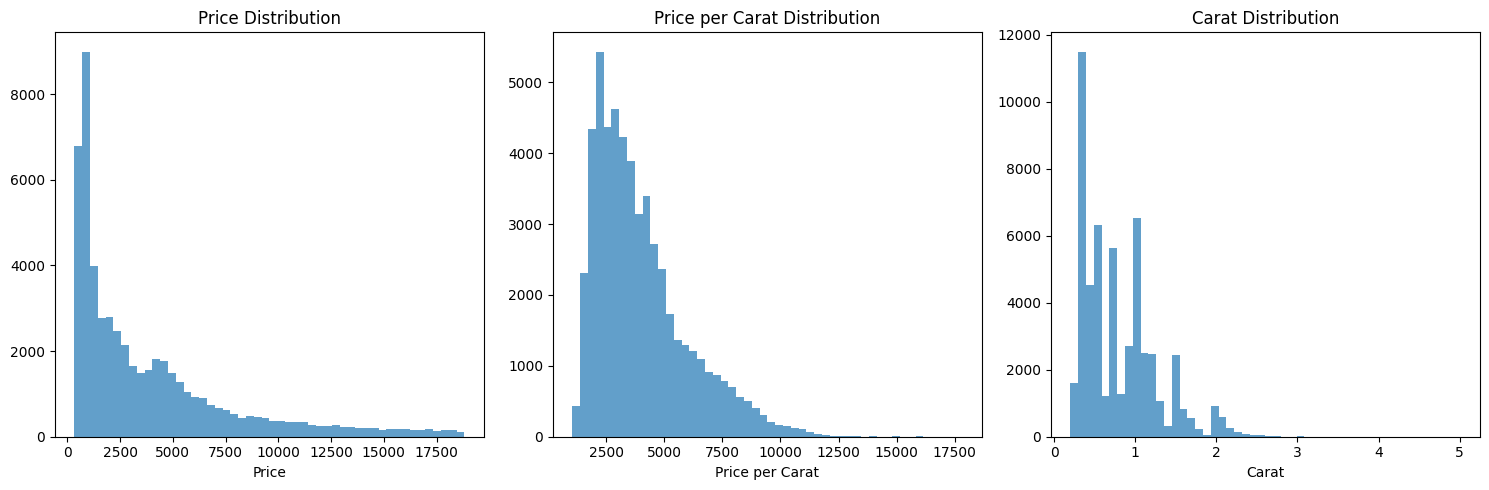

In [39]:
# Corrected version using fig, axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(diamonds['price'], bins=50, alpha=0.7)
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')


axes[1].hist(diamonds['price_per_carat'], bins=50, alpha=0.7)
axes[1].set_title('Price per Carat Distribution')
axes[1].set_xlabel('Price per Carat')

axes[2].hist(diamonds['carat'], bins=50, alpha=0.7)
axes[2].set_title('Carat Distribution')
axes[2].set_xlabel('Carat')

plt.tight_layout()
plt.show()


<h4>2) Quality Features Analysis</h4>

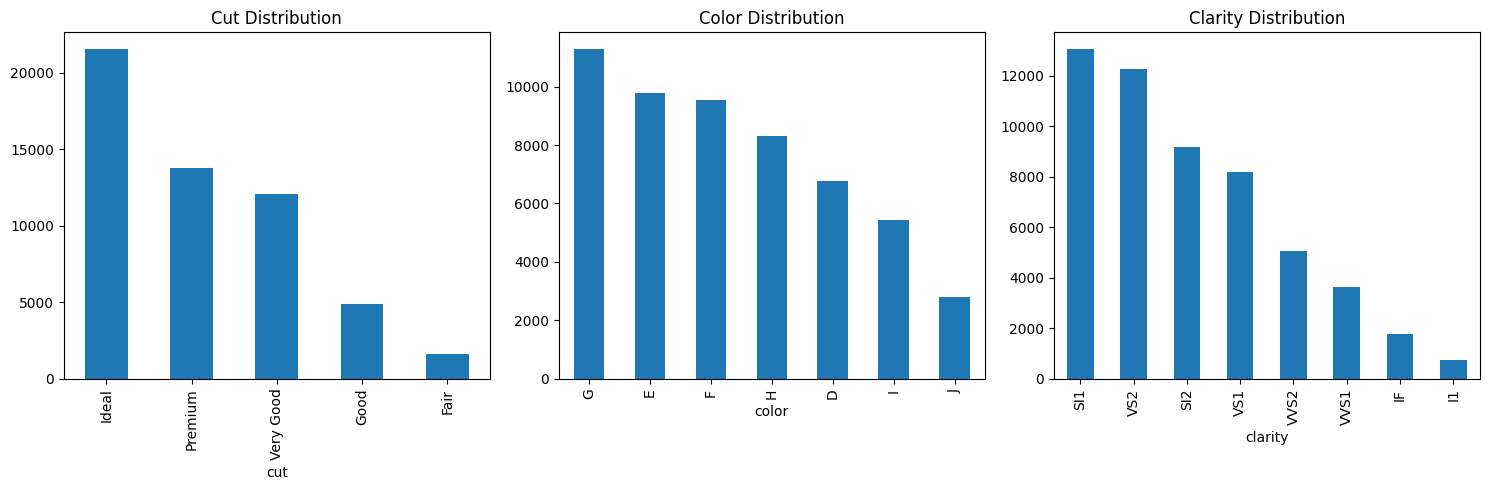

In [11]:
# Distribution of quality features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

diamonds['cut'].value_counts().plot(kind='bar', ax=axes[0], title='Cut Distribution')
diamonds['color'].value_counts().plot(kind='bar', ax=axes[1], title='Color Distribution')
diamonds['clarity'].value_counts().plot(kind='bar', ax=axes[2], title='Clarity Distribution')

plt.tight_layout()
plt.show()

In [27]:
def create_distribution_plots(diamonds):
    """Create box plots and density plots for price per carat by quality dimensions"""

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Box plots
    sns.boxplot(data=diamonds, x='cut', y='price_per_carat', ax=axes[0])
    axes[0].set_title('Price per Carat by Cut (Box Plot)')
    axes[0].tick_params(axis='x', rotation=45)

    sns.boxplot(data=diamonds, x='color', y='price_per_carat', ax=axes[1])
    axes[1].set_title('Price per Carat by Color (Box Plot)')
    axes[1].tick_params(axis='x', rotation=45)

    sns.boxplot(data=diamonds, x='clarity', y='price_per_carat', ax=axes[2])
    axes[2].set_title('Price per Carat by Clarity (Box Plot)')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

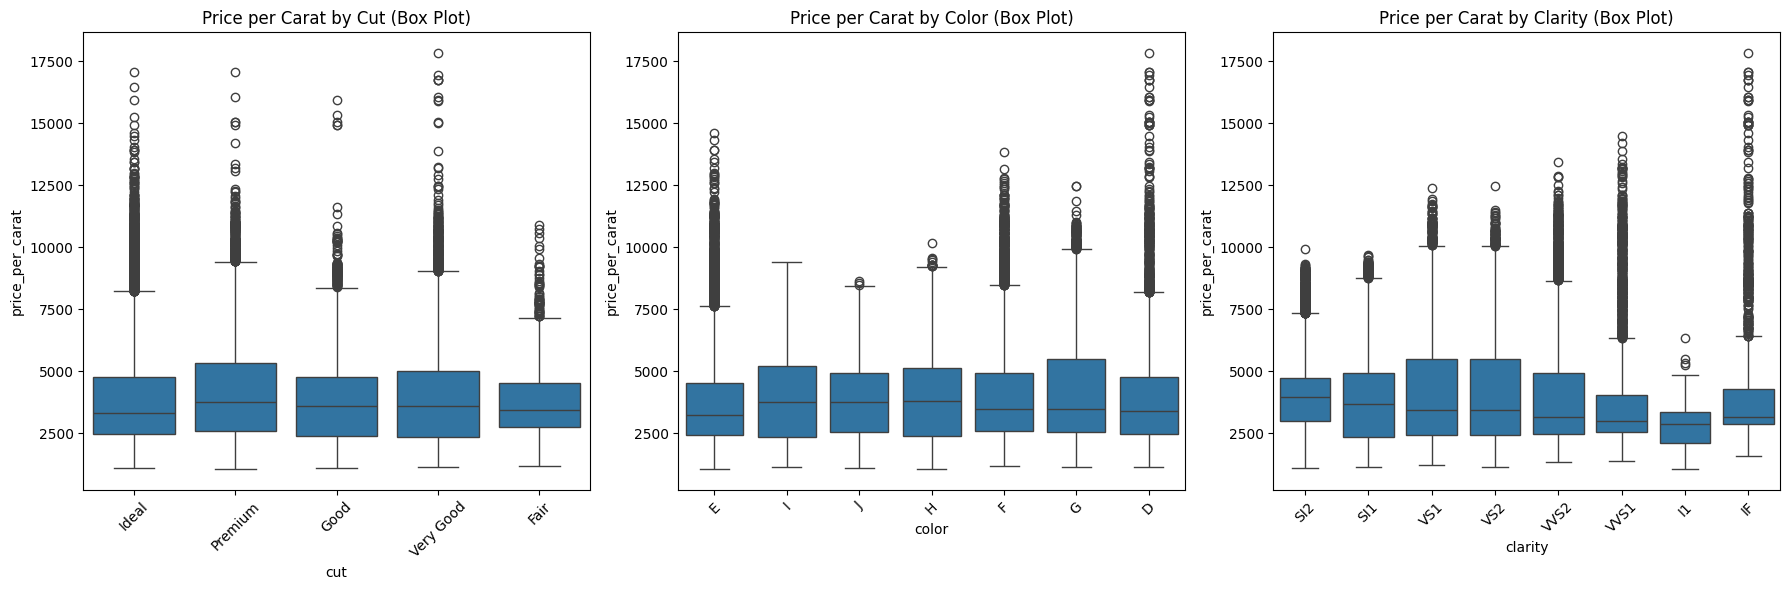

In [28]:
create_distribution_plots(diamonds)

In [34]:
def create_density_plots(diamonds):
    """Create density plots for price per carat by quality features"""

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Density by Cut
    for level in sorted(diamonds['cut'].unique()):
        subset = diamonds[diamonds['cut'] == level]
        sns.kdeplot(subset['price_per_carat'], ax=axes[0], label=level, fill=True, alpha=0.6, linewidth=1.5)
    axes[0].set_title('Density of Price per Carat by Cut')
    axes[0].legend(title='Cut')

    # Density by Color
    for level in sorted(diamonds['color'].unique()):
        subset = diamonds[diamonds['color'] == level]
        sns.kdeplot(subset['price_per_carat'], ax=axes[1], label=level, fill=True, alpha=0.6, linewidth=1.5)
    axes[1].set_title('Density of Price per Carat by Color')
    axes[1].legend(title='Color')

    # Density by Clarity
    for level in sorted(diamonds['clarity'].unique()):
        subset = diamonds[diamonds['clarity'] == level]
        sns.kdeplot(subset['price_per_carat'], ax=axes[2], label=level, fill=True, alpha=0.6, linewidth=1.5)
    axes[2].set_title('Density of Price per Carat by Clarity')
    axes[2].legend(title='Clarity')

    plt.tight_layout()
    plt.show()


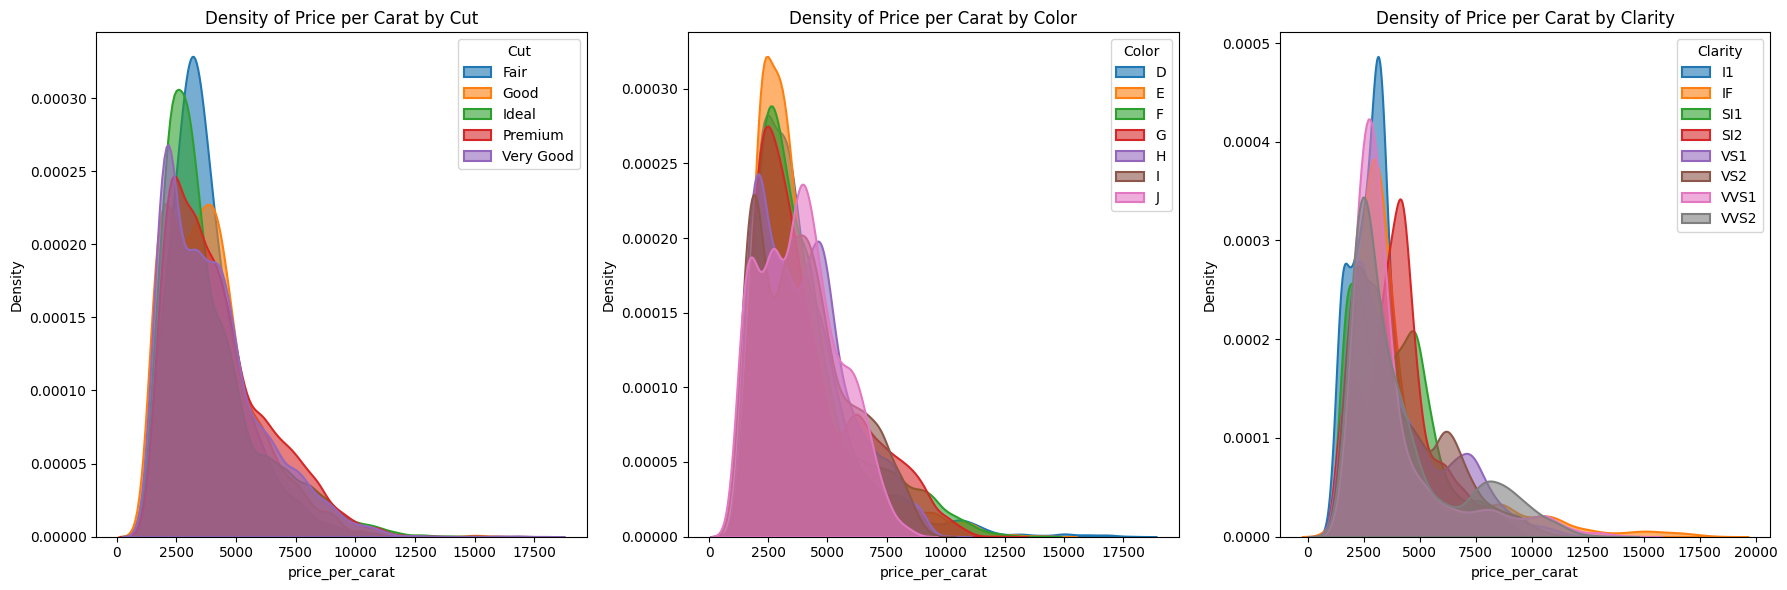

In [35]:
create_density_plots(diamonds)

<h3>Create small multiples of density plots for price per carat by quality features with distinct colors</h3>


In [36]:
def plot_small_multiples(diamonds):

    # Custom palettes
    cut_palette = sns.color_palette("Set2", len(diamonds['cut'].unique()))
    color_palette = sns.color_palette("Set1", len(diamonds['color'].unique()))
    clarity_palette = sns.color_palette("Set3", len(diamonds['clarity'].unique()))

    # --- Cut ---
    g1 = sns.FacetGrid(diamonds, col='cut', col_wrap=3, height=4, sharex=True, sharey=True)
    for i, ax in enumerate(g1.axes.flatten()):
        if i < len(g1.col_names):
            sns.kdeplot(
                data=diamonds[diamonds['cut'] == g1.col_names[i]],
                x='price_per_carat',
                fill=True,
                alpha=0.7,
                color=cut_palette[i],
                ax=ax
            )
    g1.fig.subplots_adjust(top=0.85)
    g1.fig.suptitle('Price per Carat Distribution by Cut', fontsize=16)

    # --- Color ---
    g2 = sns.FacetGrid(diamonds, col='color', col_wrap=4, height=4, sharex=True, sharey=True)
    for i, ax in enumerate(g2.axes.flatten()):
        if i < len(g2.col_names):
            sns.kdeplot(
                data=diamonds[diamonds['color'] == g2.col_names[i]],
                x='price_per_carat',
                fill=True,
                alpha=0.7,
                color=color_palette[i],
                ax=ax
            )
    g2.fig.subplots_adjust(top=0.85)
    g2.fig.suptitle('Price per Carat Distribution by Color', fontsize=16)

    # --- Clarity ---
    g3 = sns.FacetGrid(diamonds, col='clarity', col_wrap=4, height=4, sharex=True, sharey=True)
    for i, ax in enumerate(g3.axes.flatten()):
        if i < len(g3.col_names):
            sns.kdeplot(
                data=diamonds[diamonds['clarity'] == g3.col_names[i]],
                x='price_per_carat',
                fill=True,
                alpha=0.7,
                color=clarity_palette[i],
                ax=ax
            )
    g3.fig.subplots_adjust(top=0.85)
    g3.fig.suptitle('Price per Carat Distribution by Clarity', fontsize=16)

    plt.show()


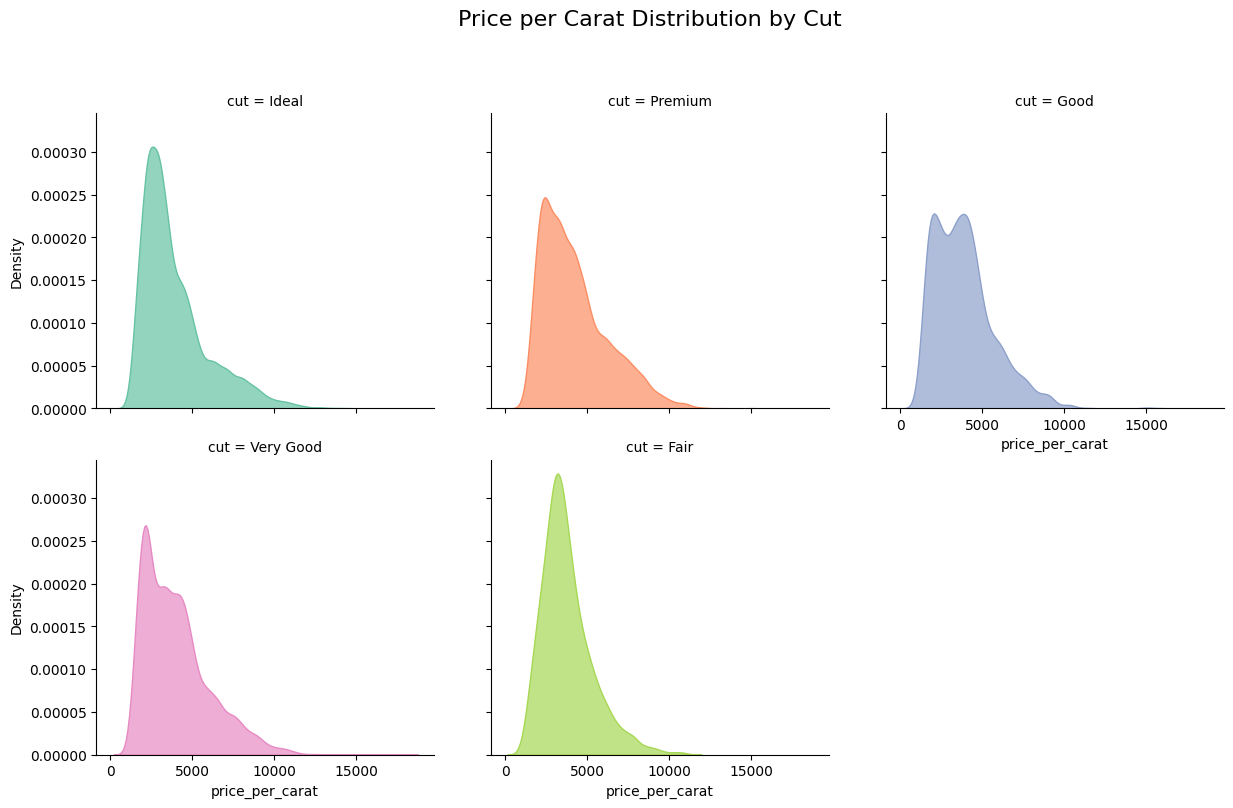

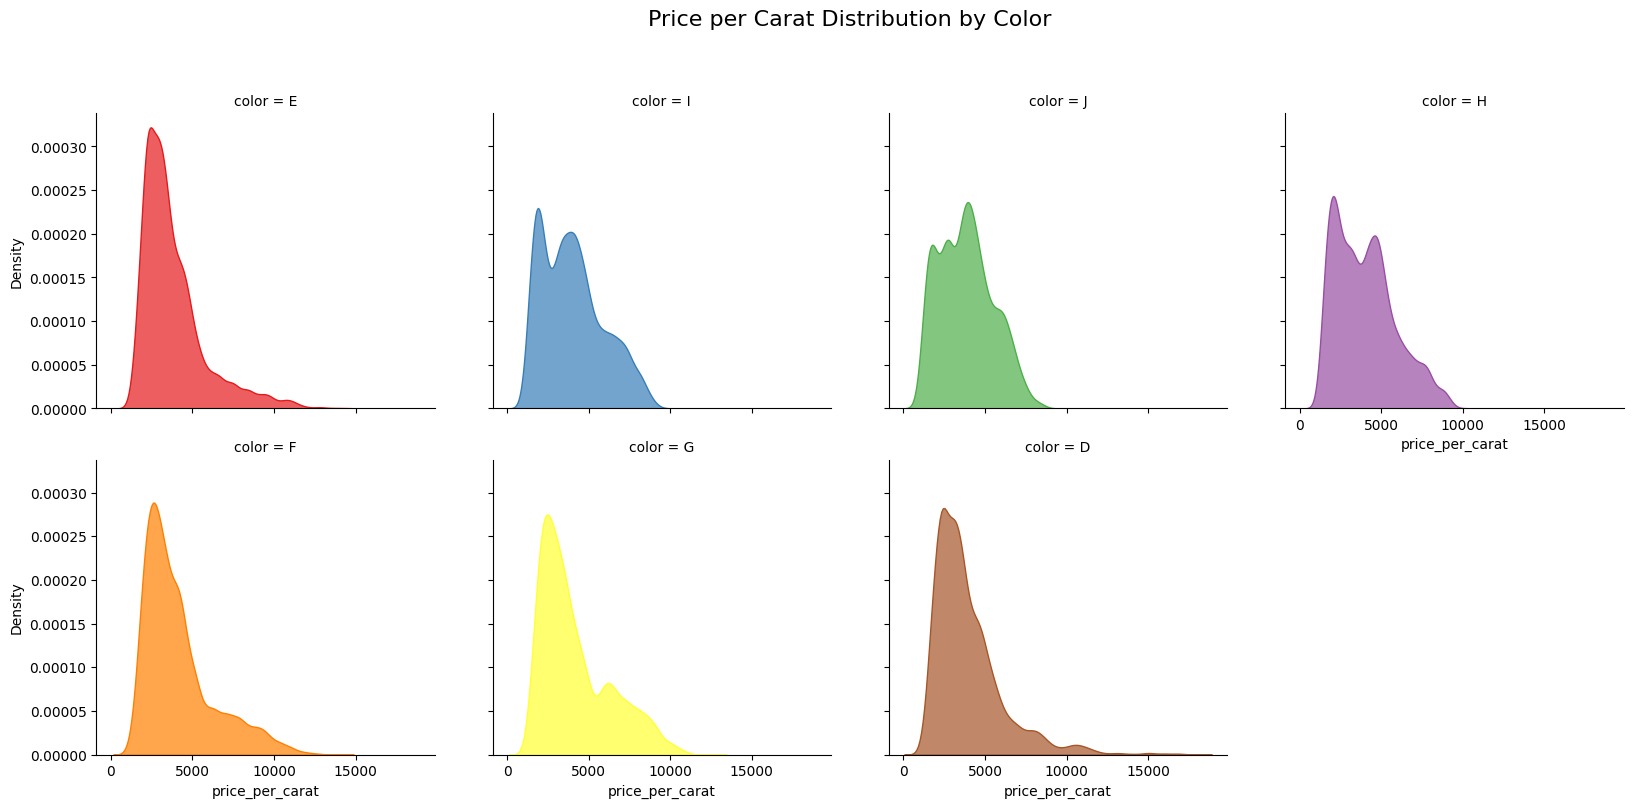

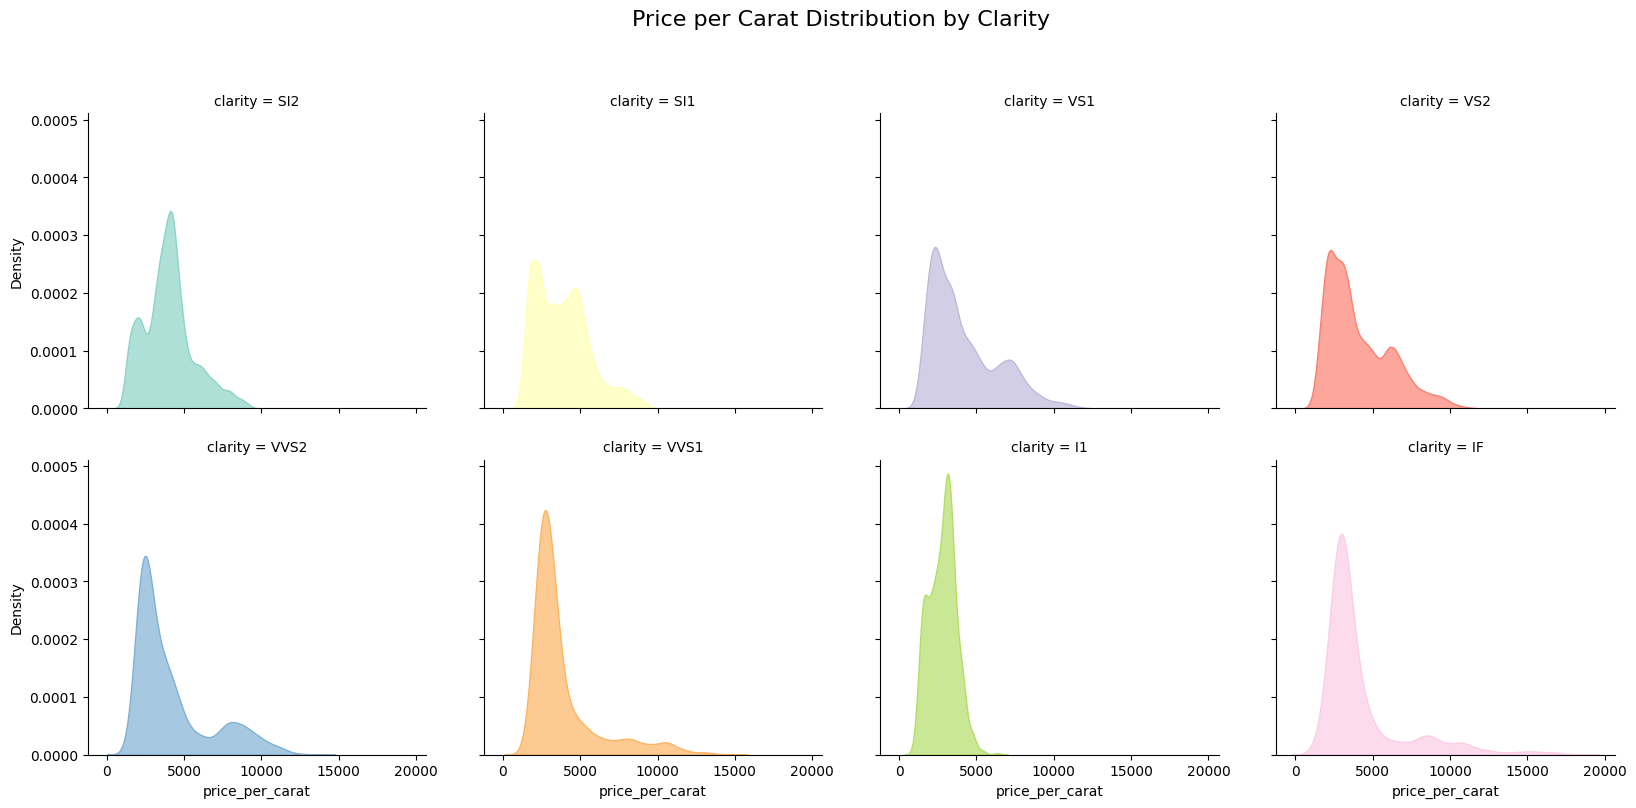

In [37]:
plot_small_multiples(diamonds)

In [38]:
def create_heatmaps(diamonds):
    """Create heatmaps showing price variations by feature combinations"""

    # Create pivot tables for heatmaps
    color_clarity_pivot = diamonds.pivot_table(
        values='price_per_carat',
        index='color',
        columns='clarity',
        aggfunc='mean'
    )

    cut_color_pivot = diamonds.pivot_table(
        values='price_per_carat',
        index='cut',
        columns='color',
        aggfunc='mean'
    )

    cut_clarity_pivot = diamonds.pivot_table(
        values='price_per_carat',
        index='cut',
        columns='clarity',
        aggfunc='mean'
    )

    # Create heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    sns.heatmap(color_clarity_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0])
    axes[0].set_title('Average Price per Carat: Color vs Clarity')

    sns.heatmap(cut_color_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('Average Price per Carat: Cut vs Color')

    sns.heatmap(cut_clarity_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2])
    axes[2].set_title('Average Price per Carat: Cut vs Clarity')

    plt.tight_layout()
    plt.show()

    return color_clarity_pivot, cut_color_pivot, cut_clarity_pivot

<ipython-input-46-1299328412>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  color_clarity_pivot = diamonds.pivot_table(
<ipython-input-46-1299328412>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cut_color_pivot = diamonds.pivot_table(
<ipython-input-46-1299328412>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cut_clarity_pivot = diamonds.pivot_table(


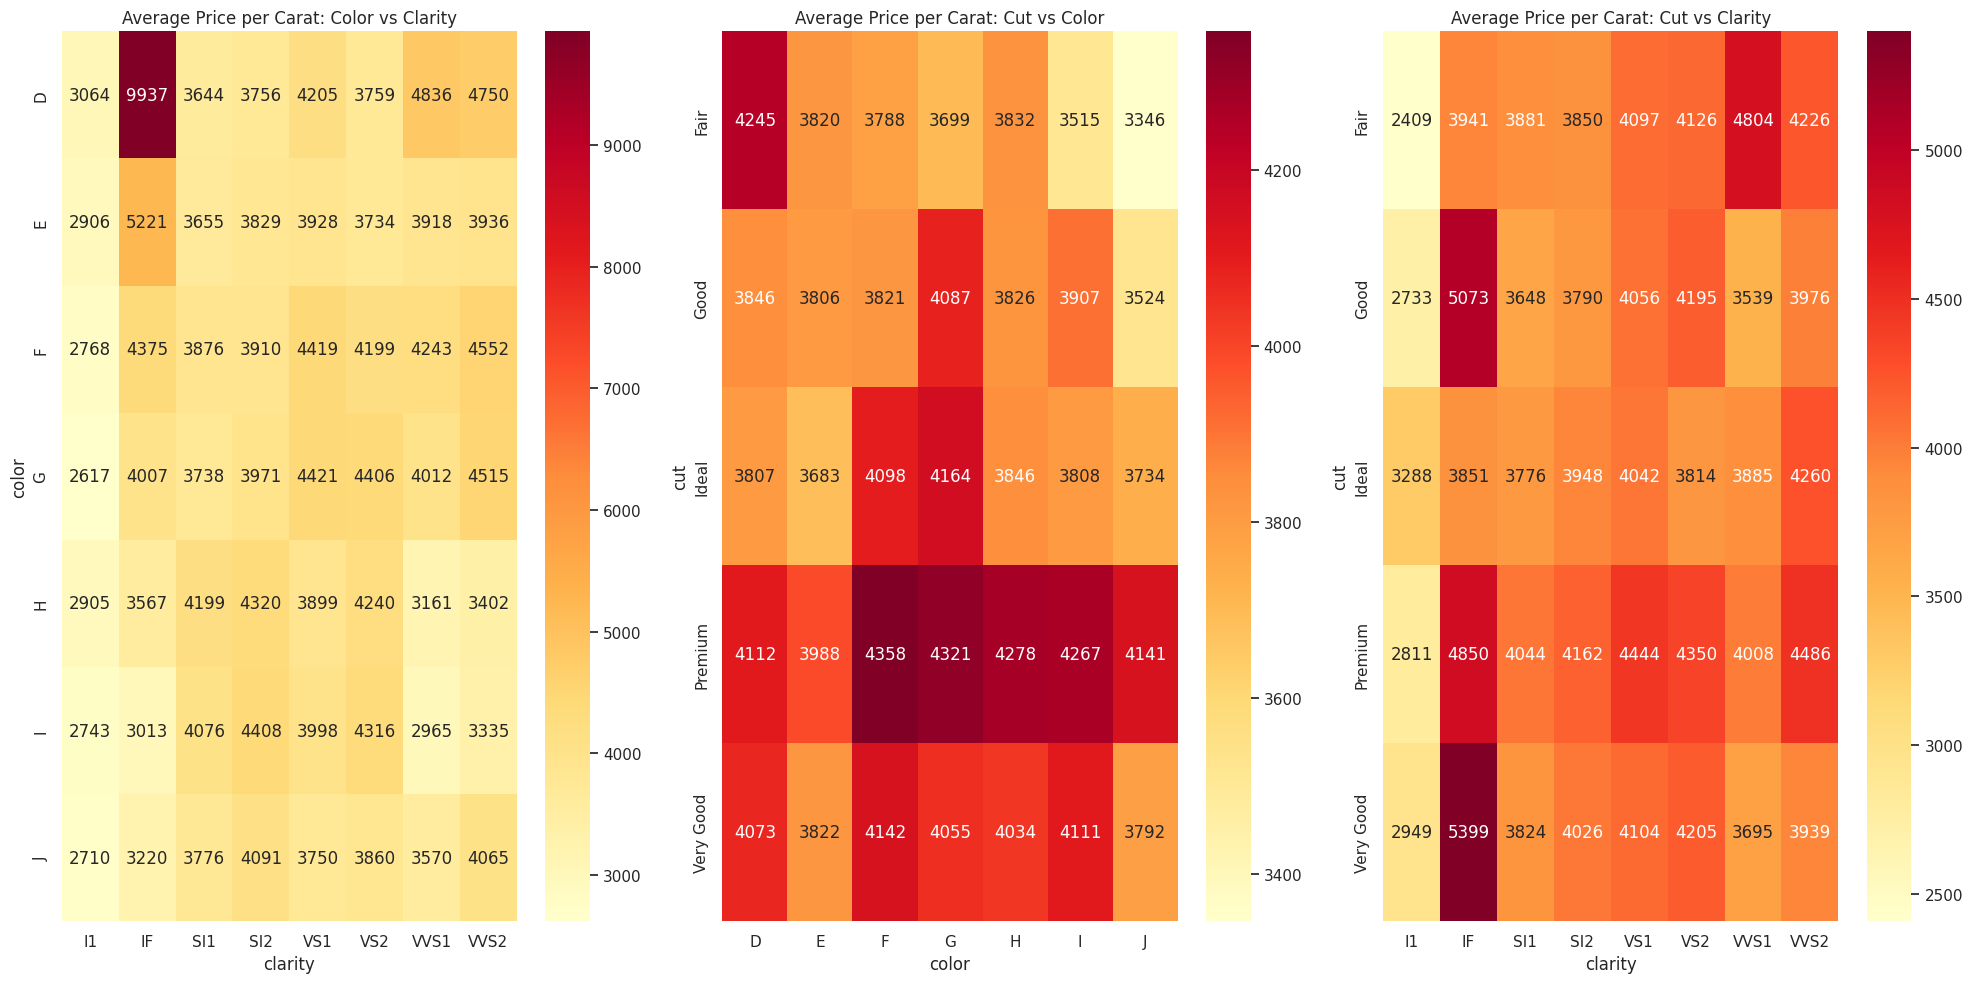

(clarity           I1           IF          SI1          SI2          VS1  \
 color                                                                      
 D        3064.484971  9937.418575  3644.009657  3755.893169  4204.891185   
 E        2906.259703  5220.976332  3654.504411  3829.409634  3928.457687   
 F        2768.384984  4375.381385  3875.615359  3910.304885  4419.335425   
 G        2617.477998  4007.009878  3737.545596  3971.004266  4420.881319   
 H        2904.849068  3566.941903  4198.802720  4319.837880  3898.528814   
 I        2742.592568  3013.211247  4075.542765  4408.040295  3998.211839   
 J        2710.079672  3220.227335  3775.638640  4091.030422  3750.350528   
 
 clarity          VS2         VVS1         VVS2  
 color                                           
 D        3758.896426  4835.817015  4749.576688  
 E        3734.329833  3918.263511  3935.711014  
 F        4198.895104  4243.090287  4552.217945  
 G        4405.773651  4011.671494  4515.092966  
 H   

In [47]:
create_heatmaps(diamonds)